 ## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np


#load the dataset
df = pd.read_csv('amazon_reviews.csv', nrows=10000)

# keep only the required columns
df = df[['Text', 'Score']]

""" Convert the Score column into sentiment labels:

    Positive (Score 4-5)

    Neutral (Score 3)

    Negative (Score 1-2) """


df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))

# dropping the score column
df = df.drop('Score', axis=1)

# check for missing values
df.dropna(inplace=True)



## Exploratory Data Analysis (EDA)


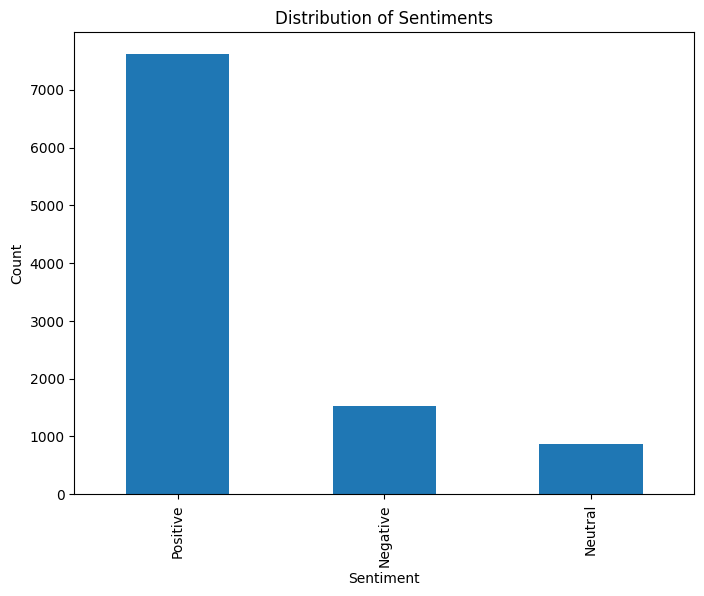

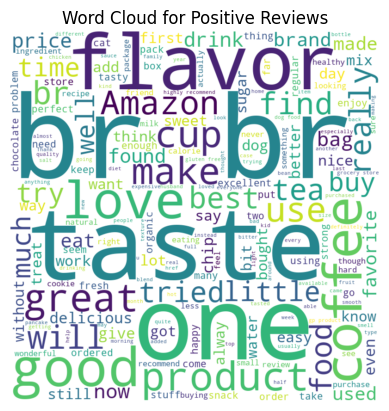

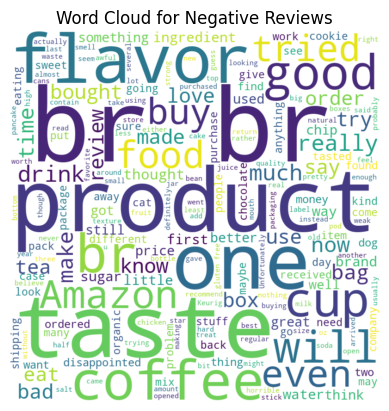

In [2]:
## Analyzing the distribution of sentiments.
#Visualizing the most common words in positive and negative reviews using word clouds.

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.utils import resample


# Distribution of sentiments
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()


# Word clouds for positive reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Text'])
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


# Word clouds for negative reviews
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Text'])
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()




 ## Text Preprocessing

In [18]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import gensim.downloader as api



nltk.download('stopwords')
nltk.download('wordnet')

# Load pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text preprocessing 
def preprocess_text(text):
    text = text.lower() # convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation and special characters
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]) # remove stopwords
    return text # perform tokenization and stemming/lemmatization

# Convert text to Word2Vec vector
def text_to_vector(text, model):
    words = text.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Converting text data into numerical features using Word2Vec vectorizer
X_word2vec = np.array([text_to_vector(text, word2vec_model) for text in df['Text']])



df['Cleaned_Text'] = df['Text'].apply(preprocess_text)





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# spliting the dataset into training and testing sets

X = df['Cleaned_Text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# converting text data into numerical features using TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# training model using Support Vector Machine(SVM )
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Model Evaluation

In [20]:
# Evaluating the model using accuracy, precision, recall, and F1-score.

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.823
Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.48      0.58       321
     Neutral       0.70      0.09      0.16       171
    Positive       0.84      0.98      0.90      1508

    accuracy                           0.82      2000
   macro avg       0.75      0.52      0.55      2000
weighted avg       0.81      0.82      0.79      2000



## Visualization of Results

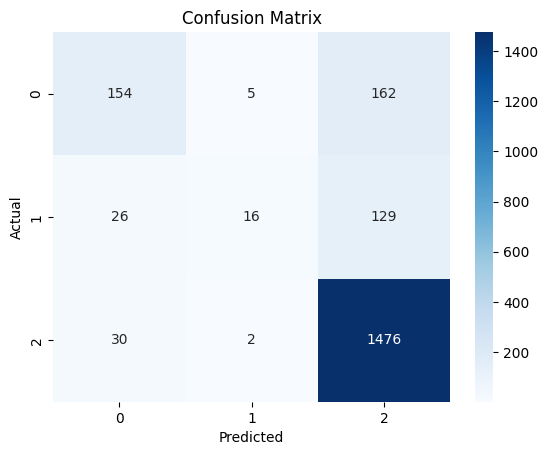

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Saving the Model and Preprocessing Pipeline

import joblib

# Save the trained model
joblib.dump(model, 'sentiment_model.pkl')

# Save the tfidf vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')






['tfidf_vectorizer.pkl']